In [147]:
import warnings
warnings.simplefilter('ignore')

# %matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt

In [212]:
# brain = pd.read_csv('final_data.csv')
# brain.head()

In [213]:
# brain.Zipcode.unique()

In [214]:
# indexNames = brain[ (brain['Zipcode'] == '-2400') 
#                    | (brain['Zipcode'] == '-4003')
#                    | (brain['Zipcode'] == '-2062')
#                    | (brain['Zipcode'] == '???')
#                    | (brain['Zipcode'] == '#REF!')
#                    | (brain['Zipcode'] == '-4606')
#                    | (brain['Zipcode'] == '-2062')
#                    | (brain['Zipcode'] == '-4003')].index
# brain.drop(indexNames , inplace=True)
# brain.head()

In [215]:
# A= brain.drop(columns=['Latitude','Longitude','Unnamed: 0'])
# # brain['Zipcode'].apply(str)
# # brain.Zipcode.unique()
# A.head()

In [141]:
# brain.sort_values(by=['Zipcode'])
# brain.head()
# B['date'] = B['date'].apply(lambda x: 
#                                     dt.datetime.strptime(x,'%d%b%Y:%H:%M:%S.%f'))
# B.dtypes
# B= A.loc[datetime.date(year=2006,month=1,day=1):datetime.date(year=2011,month=12,day=31)]
# B.date.unique()
# A.Borough.unique()

array(['BROOKLYN', 'BRONX', 'QUEENS', 'MANHATTAN', 'STATEN ISLAND'],
      dtype=object)

In [199]:
# B = brain.groupby(['Zipcode']).count()
# B= BB.head()
# # df.loc[df['shield'] > 6, ['max_speed']]
# B = A[(A['Borough'] == 'BROOKLYN') | (A['Borough'] == 'QUEENS' )]
# C = A[(A['Borough'] == 'BRONX') | (A['Borough'] == 'STATEN ISLAND' ) | (A['Borough'] == 'MANHATTAN' )]

In [200]:
# summary = pd.merge(B, grouped_merged_table_mean, on="school_name")


In [201]:
# B.to_csv('new_data1.csv', encoding='utf-8', index=False)
# C.to_csv('new_data2.csv', encoding='utf-8', index=False)

In [219]:
brain = pd.read_csv('final_data.csv')
# brain.count()
brain.head()

,date,Borough,week day,Month,TMAX,TMIN,holiday,Year,Total
0,1/1/2006,BRONX,Sunday,January,42,32,holiday,A2006,71
1,1/1/2006,MANHATTAN,Sunday,January,42,32,holiday,A2006,47
2,1/1/2006,STATEN ISLAND,Sunday,January,42,32,holiday,A2006,17
3,1/2/2006,BRONX,Monday,January,48,39,No Holiday,A2006,33
4,1/2/2006,MANHATTAN,Monday,January,48,39,No Holiday,A2006,17


In [220]:
# brain['Zipcode'] = brain['Zipcode'].astype(str)
# brain.dtypes

Step 1) Convert Categorical data to numbers using Integer or Binary Encoding

In [221]:
X = pd.get_dummies(brain[["Borough" , "week day", "Month","TMAX","TMIN","holiday","Year"]])
y = brain["Total"].values.reshape(-1, 1)
X.head()

,TMAX,TMIN,Borough_BRONX,Borough_BROOKLYN,Borough_MANHATTAN,Borough_QUEENS,Borough_STATEN ISLAND,week day_Friday,week day_Monday,week day_Saturday,...,Year_A2008,Year_A2009,Year_A2010,Year_A2011,Year_A2012,Year_A2013,Year_A2014,Year_A2015,Year_A2016,Year_A2017
0,42,32,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,42,32,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,42,32,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,48,39,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,48,39,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [227]:
for col in X.columns: 
    print(col) 

TMAX
TMIN
Borough_BRONX
Borough_BROOKLYN
Borough_MANHATTAN
Borough_QUEENS
Borough_STATEN ISLAND
week day_Friday
week day_Monday
week day_Saturday
week day_Sunday
week day_Thursday
week day_Tuesday
week day_Wednesday
Month_April
Month_August
Month_December
Month_February
Month_January 
Month_July
Month_June
Month_March
Month_May
Month_November
Month_October
Month_September
holiday_No Holiday
holiday_holiday
Year_A2006
Year_A2007
Year_A2008
Year_A2009
Year_A2010
Year_A2011
Year_A2012
Year_A2013
Year_A2014
Year_A2015
Year_A2016
Year_A2017


Step 2) Split data into training and testing data

In [222]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

Step 3) Scale or Normalize your data. Use StandardScaler if you don't know anything about your data.

In [223]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

Step 4) Fit the Model to the scaled training data and make predictions using the scaled test data

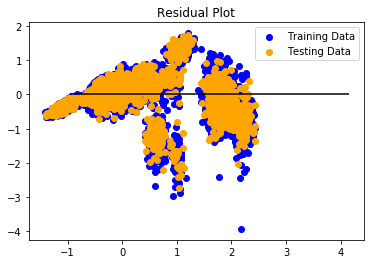

In [224]:
# Plot the results 
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

Step 5) Quantify your model using the scaled data

In [248]:
from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.19444144488396295, R2: 0.7984829980163528


In [249]:
A = [30 , 20 , 1 ,0 , 0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0]

In [250]:
print (A)

[30, 20, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [251]:
# A.shape()
B=np.asarray(A)
# model.predict(A)

In [252]:
print(B)

[30 20  1  0  0  0  0  1  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0
  0  0  1  0  1  0  0  0  0  0  0  0  0  0  0  0]


In [253]:
B.shape

(40,)

In [254]:
C=B.reshape(1,-1)

In [255]:
prediction1 = model.predict(C)

In [256]:
print(prediction1)

[[-1.03910902e+12]]
